### Data frame extret de https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

In [105]:
import pandas as pd
import math
import numpy as np
import statistics
import matplotlib.pyplot as plt
df=pd.read_csv("athlete_events.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica

# Exercici 1
### Mitjana aritmètica

In [106]:
anys=list(df['Year'].dropna())
print(anys[:11])

[1992, 2012, 1920, 1900, 1988, 1988, 1992, 1992, 1994, 1994, 1992]


In [107]:
def Mitja(df,columna):
    llista=list(df[columna].dropna())
    mitja=sum(llista)/len(llista)
    return mitja

In [108]:
mitja=Mitja(df,'Year')
print(mitja)

1978.3784800601957


o també es pot fer:

In [109]:
statistics.mean(anys)

1978.3784800601957

### Moda

In [110]:
def Moda(df, columna):
    serie=df.groupby(columna).size().sort_values(ascending=False)
    count=serie.iloc[0]
    moda=[]
    for i in range(len(serie)):
        if serie.iloc[i]>=count:
            moda.append(serie.index[i])
    return moda

In [111]:
moda=Moda(df,'Year')
print(moda)

[1992]


o també es pot fer:

In [112]:
moda=statistics.mode(anys)
print(moda)

1992


### Mediana

In [113]:
def Mediana(df,columna):
    llista=list(df[columna].dropna())
    llista.sort()
    if len(llista)%2==0: #Si és parell
        n=math.floor(len(llista)/2)
        mediana1=llista[n-1]
        mediana2=llista[n]
        mediana=(mediana1+mediana2)/2
    elif len(llista)%2!=0: #Si és imparell
        n=math.floor(len(llista)/2)
        mediana=llista[n]
    return mediana        

In [114]:
mediana=Mediana(df,'Year')
print(mediana)

1988.0


o també es pot fer:

In [115]:
mediana=statistics.median(anys)
print(mediana)

1988.0


### Desviació estandard

La desviació estàndard (s) es calcula amb la fórmula:
[<img src="https://nestedsoftware.com/assets/images/2018-03-12-the-geometry-of-standard-deviation--3m3o.21736/ggzs44981kodjlgn5lml.png" width="200">](https://nestedsoftware.com/2018/03/12/the-geometry-of-standard-deviation-3m3o.21736.html)
on x̄ és la mitja, $x_{i}$ és cada un dels valors observats, i n és la mida de la mostra.

In [116]:
def Desviacio(df,columna):
    llista=list(df[columna].dropna())
    mitja = Mitja(df,columna)
    sumatori=0
    for i in llista:
        sumatori += (i-mitja)**2
    n=len(llista)-1
    s2=sumatori/n
    s=math.sqrt(s2)
    return s

In [117]:
desviacio = Desviacio(df,'Year')
print(desviacio)

29.877631985612652


o també es pot fer:

In [118]:
desviacio = statistics.stdev(anys)
print(desviacio)

29.877631985613426


### Correlació

La correlació de pearson de dues variables x i y ($r_{xy}$) es calcula amb la fórmula:
[<img src="https://www.mathsisfun.com/data/images/correlation-formula.gif" width="300">](https://www.mathsisfun.com/data/correlation.html)

In [119]:
def Correlacio(df,columna1,columna2):
    df=df.dropna()
    mitja1=Mitja(df,columna1)
    mitja2=Mitja(df,columna2)
    llista1=list(df[columna1])
    llista2=list(df[columna2])
    a=[]
    a2=[]
    b=[]
    b2=[]
    ab=[]
    for i in llista1:
        a.append(i-mitja1)
        a2.append((i-mitja1)**2)
    for j in llista2:
        b.append(j-mitja2)
        b2.append((j-mitja2)**2)
    for k in range(len(llista1)):
        ab.append(a[k]*b[k])
    r=sum(ab)/math.sqrt(sum(a2)*sum(b2))
    return r

In [120]:
r=Correlacio(df,'Age','Weight')
print(r)

0.1617503196209218


In [121]:
df2=df.dropna()
x=list(df2['Age'])
y=list(df2['Weight'])
r=np.corrcoef(x,y)
print(r)

[[1.         0.16175032]
 [0.16175032 1.        ]]


Dóna una matriu de correlacions entre x i y, x amb x, x amb y, y amb x i y amb y.

# Exercici 2
Correlacions

In [122]:
r = df.corr()
print(r)

              ID       Age    Height    Weight      Year
ID      1.000000 -0.003631 -0.011141 -0.009176  0.011885
Age    -0.003631  1.000000  0.138246  0.212069 -0.115137
Height -0.011141  0.138246  1.000000  0.796213  0.047578
Weight -0.009176  0.212069  0.796213  1.000000  0.019095
Year    0.011885 -0.115137  0.047578  0.019095  1.000000


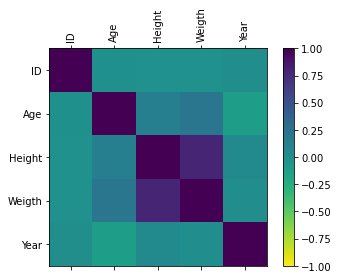

In [123]:
fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(r,cmap='viridis_r', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df2.columns[0:5]),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(['ID','Age','Height','Weigth','Year'])
ax.set_yticklabels(['ID','Age','Height','Weigth','Year'])
plt.show()

# Exercici 3
### Mitja geomètrica

In [124]:
from scipy.stats.mstats import gmean
mitjaGeometrica = gmean(df['Height'].dropna())
print(mitjaGeometrica)

175.02216902512546


### Mitja harmònica

In [125]:
def Harmonica(df,columna):
    llista=list(df[columna].dropna())
    n=len(llista)
    values=[1/i for i in llista]
    suma=0
    for j in values:
        suma+=j
    h=n/suma
    return h

harmonica=Harmonica(df,'Height')
print(harmonica)

174.70364252343094
